User interface for EnergyScop TD version Students_LMECA2675

Thanks to this user interface, you can :
- **update the ESTD_data.dat file** defining the data of used for the optimization with the data from the CSV files in your data folder.
- **import the input data** from the CSV into python to analyse it.
- **modify the input data** and **save and get back** your modified data
- **print the input data** into the ESTD_data.dat files respecting the syntax of AMPL
- **run basic analysis** of imported data with build in functions.
    
**Steps to update ESTD_data.dat**
1. Import the usefull libraries and functions
2. Change the user defined parameter to your convinience
3. Define your import_folders and out_path
4. Import the data from the CSV files into this notebook thanks to import_data function
5. Modify the data into this notebook
6. Print your data into the ESTD_data.dat file thanks to the print_data function
6. Run EnergyScope TD

# 1. Importing usefull libraries and functions

In [1]:
import numpy as np
import pandas as pd
import time
import csv
import matplotlib.pyplot as plt

In [2]:
from usefull_functions import import_data
from usefull_functions import print_data

# 2. User defined parameters
You can adapt the following parameter(s) according to your scenario

In [3]:
## User defined
gwp_limit = 150000 # [ktCO2-eq./year]	# Minimum GWP reduction 

# 3. Import folders and output path

In [4]:
import_folders = ['Data\\User_data', 'Data\\Developper_data']

In [5]:
out_path = 'STEP_2_Energy_Model/ESTD_data.dat'

# 4. Importing CSV data files

In [6]:
Eud, Resources, Technologies, \
End_uses_categories, Layers_in_out, Storage_characteristics, Storage_eff_in, \
Storage_eff_out, Time_Series = import_data(import_folders)

In [7]:
Technologies

,Category,Subcategory,Technologies name,c_inv,c_maint,gwp_constr,lifetime,c_p,fmin_perc,fmax_perc,f_min,f_max
Technologies param,,,,,,,,,,,,
NUCLEAR,Electricity,Electricity,Nuclear,4845.734619,102.930986,707.88,60,0.849,0,1,0,0
CCGT,Electricity,Electricity,Combine cycle gas turbine,800,19.55202588,183.79,25,0.961538462,0,1,0,1.00E+15
COAL_US,Electricity,Electricity,Coal power plant,2516.705684,29.38376695,331.6,35,0.868,0,1,0,1.00E+15
COAL_IGCC,Electricity,Electricity,COAL_IGCC,3245.809533,48.42022379,331.6,35,0.856,0,1,0,0
PV,Electricity,Electricity,Photovoltaic,870,9.935466867,2081.43,25,1,0,1,0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...
TS_HIGH_TEMP,Storage,Storage,thermal storage industries,28.03,0.3,0,25,1,0,1,0,1.00E+15
SEASONAL_NG,Storage,Storage,gas storage,0.051158,0.001309164,0,50,1,0,1,0,1.00E+15
SEASONAL_H2,Storage,Storage,hydrogen storage,6.19,0.39,0,20,1,0,1,0,1.00E+15


# 5. Modify here the data

## Example : changing the f_max of PV

In [7]:
# Seing 
Technologies.head()

,Category,Subcategory,Technologies name,c_inv,c_maint,gwp_constr,lifetime,c_p,fmin_perc,fmax_perc,f_min,f_max
Technologies param,,,,,,,,,,,,
NUCLEAR,Electricity,Electricity,Nuclear,4845.734619,102.930986,707.88,60,0.849,0,1,0,0
CCGT,Electricity,Electricity,Combine cycle gas turbine,800,19.55202588,183.79,25,0.961538462,0,1,0,1.00E+15
COAL_US,Electricity,Electricity,Coal power plant,2516.705684,29.38376695,331.6,35,0.868,0,1,0,1.00E+15
COAL_IGCC,Electricity,Electricity,COAL_IGCC,3245.809533,48.42022379,331.6,35,0.856,0,1,0,0
PV,Electricity,Electricity,Photovoltaic,870,9.935466867,2081.43,25,1,0,1,0,59.2


In [8]:
Technologies.loc['PV','f_max'] = 100

In [9]:
Technologies.head()

,Category,Subcategory,Technologies name,c_inv,c_maint,gwp_constr,lifetime,c_p,fmin_perc,fmax_perc,f_min,f_max
Technologies param,,,,,,,,,,,,
NUCLEAR,Electricity,Electricity,Nuclear,4845.734619,102.930986,707.88,60,0.849,0,1,0,0
CCGT,Electricity,Electricity,Combine cycle gas turbine,800,19.55202588,183.79,25,0.961538462,0,1,0,1.00E+15
COAL_US,Electricity,Electricity,Coal power plant,2516.705684,29.38376695,331.6,35,0.868,0,1,0,1.00E+15
COAL_IGCC,Electricity,Electricity,COAL_IGCC,3245.809533,48.42022379,331.6,35,0.856,0,1,0,0
PV,Electricity,Electricity,Photovoltaic,870,9.935466867,2081.43,25,1,0,1,0,100


# Save and get back your modifications

In [10]:
saving_folder = 'Data\\Modified_data\\'

## Example with Resources dataframe

In [11]:
# What the Resources dataframe looks like
Resources.head()

,Category,Subcategory,avail,gwp_op,c_op
parameter name,,,,,
GASOLINE,Non-renewable,Fossil fuel,1000000.00000,0.3448,0.082366
DIESEL,Non-renewable,Fossil fuel,1000000.00000,0.3148,0.079744
LFO,Non-renewable,Fossil fuel,1000000.00000,0.3115,0.060151
NG,Non-renewable,Fossil fuel,1000000.00000,0.2666,0.044253
COAL,Non-renewable,Fossil fuel,33354.99944,0.4014,0.017658


In [12]:
# This is an example of how to save your data
Resources.to_csv(saving_folder+'Resources.csv', sep=';', header=True, index=True, mode='w')

In [13]:
# This is an example of how to get back some data you saved
Resources_2 = pd.read_csv(saving_folder+'Resources.csv', sep=';', index_col=0)
Resources_2.head() 

,Category,Subcategory,avail,gwp_op,c_op
parameter name,,,,,
GASOLINE,Non-renewable,Fossil fuel,1000000.00000,0.3448,0.082366
DIESEL,Non-renewable,Fossil fuel,1000000.00000,0.3148,0.079744
LFO,Non-renewable,Fossil fuel,1000000.00000,0.3115,0.060151
NG,Non-renewable,Fossil fuel,1000000.00000,0.2666,0.044253
COAL,Non-renewable,Fossil fuel,33354.99944,0.4014,0.017658


## Space for your savings

# 6. Printing data script for Energy Model (with AMPL syntax) 

In [14]:
data = (Eud, Resources, Technologies, \
End_uses_categories, Layers_in_out, Storage_characteristics, Storage_eff_in, \
Storage_eff_out, Time_Series)

In [22]:
print_data(data, out_path, gwp_limit)

# Basic analysis on input data

In [16]:
Technologies.shape

(104, 12)

In [17]:
Technologies.describe()

,Category,Subcategory,Technologies name,c_inv,c_maint,gwp_constr,lifetime,c_p,fmin_perc,fmax_perc,f_min,f_max
count,104,104,104,104,104,104,104,104,104,104,104,104
unique,6,10,104,77,72,32,13,16,1,3,2,7
top,Heat,Synthetic fuels,car gasoline,18.97181384,0,0,20,1,0,1,0,1.00E+15
freq,31,21,1,10,11,55,20,51,104,102,103,81


In [18]:
# 10 Techs with biggest c_inv
Technologies.sort_values(by=['c_inv'], ascending=False).head(10)

,Category,Subcategory,Technologies name,c_inv,c_maint,gwp_constr,lifetime,c_p,fmin_perc,fmax_perc,f_min,f_max
param:,,,,,,,,,,,,
BIOMETHANATION,Synthetic fuels,Synthetic fuels,biomass methanation,986.0473827,13.65909091,0,20,0.85,0,1,0,1.00E+15
METHANE_TO_METHANOL,Synthetic fuels,Synthetic fuels,METHANE_TO_METHANOL,958.5822643,41.91520353,0,25,0.85,0,1,0,0
PV,Electricity,Electricity,Photovoltaic,870,9.935466867,2081.43,25,1,0,1,0,100
BUS_COACH_HYDIESEL,Mobility,Passenger public,Bus diesel hybrid,833.3333333,33.33333333,0,15,0.296803653,0,1,0,1.00E+15
DHN,Synthetic fuels,Synthetic fuels,DHN,825.8825733,0,0,60,1,0,1,0,1.00E+15
CCGT,Electricity,Electricity,Combine cycle gas turbine,800,19.55202588,183.79,25,0.961538462,0,1,0,1.00E+15
TRUCK_ELEC,Mobility,Freight,TRUCK_ELEC,771.1111111,23.13333333,0,15,0.092592593,0,1,0,1.00E+15
BOAT_FREIGHT_DIESEL,Mobility,Freight,Boat diesel,76.38888889,3.819444444,0,40,0.114155251,0,1,0,1.00E+15
BOAT_FREIGHT_NG,Mobility,Freight,Boat gas,76.38888889,3.819444444,0,40,0.114155251,0,1,0,1.00E+15


In [19]:
# counts the number of occurences of each value
Technologies.loc[:,'c_inv'].value_counts()

18.97181384    10
0               7
115.1793239     4
1408.03446      2
1080.794082     2
               ..
420.2863578     1
429.4115544     1
302             1
2580            1
600             1
Name: c_inv, Length: 77, dtype: int64

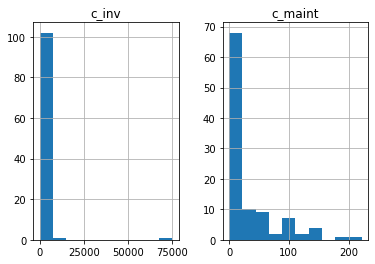

In [20]:
# print histogram of c_inv and c_maint of technologies
Technologies.loc[:,['c_inv','c_maint']].astype('float').hist()
plt.show()

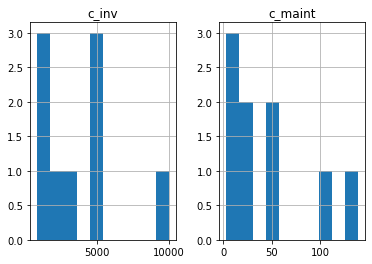

In [21]:
# print histogram of c_inv and c_maint of electricity technologies
Technologies.loc[Technologies['Category']=='Electricity',['c_inv','c_maint']].astype('float').hist()
plt.show()